In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
df_1911=pd.read_csv('data/1911-1920 일별 기온.csv', encoding='cp949')
df_1921=pd.read_csv('data/1921-1930 일별 기온.csv', encoding='cp949')
df_1931=pd.read_csv('data/1931-1940 일별 기온.csv', encoding='cp949')
df_1941=pd.read_csv('data/1941-1950 일별 기온.csv', encoding='cp949')
df_1951=pd.read_csv('data/1951-1960 일별 기온.csv', encoding='cp949')
df_1961=pd.read_csv('data/1961-1970 일별 기온.csv', encoding='cp949')
df_1971=pd.read_csv('data/1971-1980 일별 기온.csv', encoding='cp949')
df_1981=pd.read_csv('data/1981-1990 일별 기온.csv', encoding='cp949')
df_1991=pd.read_csv('data/1991-2000 일별 기온.csv', encoding='cp949')
df_2001=pd.read_csv('data/2001-2010 일별 기온.csv', encoding='cp949')
df_2011=pd.read_csv('data/2011-2020 일별 기온.csv', encoding='cp949')

In [4]:
df=pd.concat([df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,
          df_1991,df_2001,df_2011], ignore_index=True)
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5
...,...,...,...,...,...,...
1596830,295,남해,2020-12-27,4.4,2.5,6.0
1596831,295,남해,2020-12-28,4.7,1.1,11.5
1596832,295,남해,2020-12-29,5.4,1.0,11.2
1596833,295,남해,2020-12-30,-3.0,-5.4,1.6


In [5]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1596830,295,남해,2020-12-27,4.4,2.5,6.0
1596831,295,남해,2020-12-28,4.7,1.1,11.5
1596832,295,남해,2020-12-29,5.4,1.0,11.2
1596833,295,남해,2020-12-30,-3.0,-5.4,1.6
1596834,295,남해,2020-12-31,-1.3,-7.4,2.8


In [6]:
# 데이터타입 확인/변경
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [7]:
df['일시']=pd.to_datetime(df['일시'])

In [8]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

In [9]:
# 데이터 확인
df.shape

(1596835, 6)

In [10]:
df['지점명'].nunique()

102

In [11]:
# 서울시 데이터 추출하여 서브셋 생성
df_seoul=df[df['지점명']=='서울'].copy()
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295576,108,서울,2020-12-27,5.8,1.4,10.0
1295577,108,서울,2020-12-28,6.7,4.2,11.4
1295578,108,서울,2020-12-29,0.1,-6.2,4.3
1295579,108,서울,2020-12-30,-10.9,-12.9,-6.2


In [12]:
# 서울시 폭염 데이터 추출
# 일 최고기온이 33도 이상
df_seoul_hotday=df_seoul[df_seoul['최고기온(°C)']>=33].copy()
df_seoul_hotday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3519,108,서울,1911-08-09,27.0,23.1,33.0
3520,108,서울,1911-08-10,28.2,24.2,33.8
3522,108,서울,1911-08-12,28.7,25.8,34.5
3523,108,서울,1911-08-13,27.5,23.0,33.8
3527,108,서울,1911-08-17,26.4,21.5,33.5
...,...,...,...,...,...,...
1295075,108,서울,2019-08-14,30.4,25.9,35.7
1295379,108,서울,2020-06-13,26.9,20.6,33.5
1295388,108,서울,2020-06-22,28.6,21.7,35.4
1295452,108,서울,2020-08-25,29.9,26.0,34.5


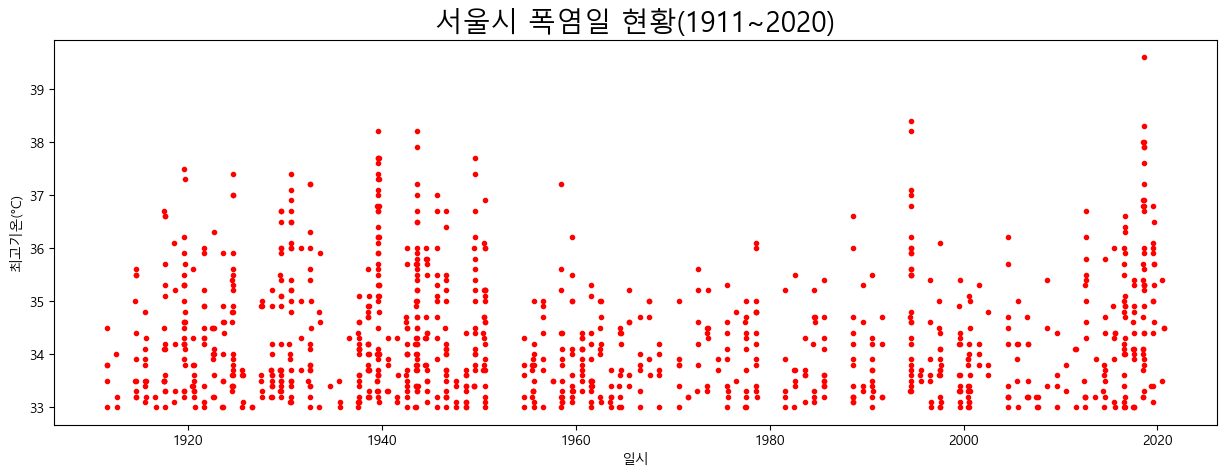

In [13]:
# 서울시 폭염 데이터 시각화
plt.rcParams['figure.figsize']=(15,5)
plt.plot(df_seoul_hotday['일시'],df_seoul_hotday['최고기온(°C)'],'r.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)')
plt.title('서울시 폭염일 현황(1911~2020)', size=20)
plt.show()

In [14]:
# 서울시 열대야 데이터 추출
# 일 최저기온이 25도 이상

In [15]:
df_seoul_hotnight = df_seoul[df_seoul['최저기온(°C)']>=25]
df_seoul_hotnight

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3522,108,서울,1911-08-12,28.7,25.8,34.5
4601,108,서울,1914-07-26,29.7,25.8,35.6
4602,108,서울,1914-07-27,30.2,25.6,35.5
4605,108,서울,1914-07-30,25.7,25.1,27.4
4621,108,서울,1914-08-15,27.2,25.2,31.5
...,...,...,...,...,...,...
1295452,108,서울,2020-08-25,29.9,26.0,34.5
1295453,108,서울,2020-08-26,30.2,27.0,34.5
1295454,108,서울,2020-08-27,27.1,25.6,28.6
1295455,108,서울,2020-08-28,27.3,26.0,29.7


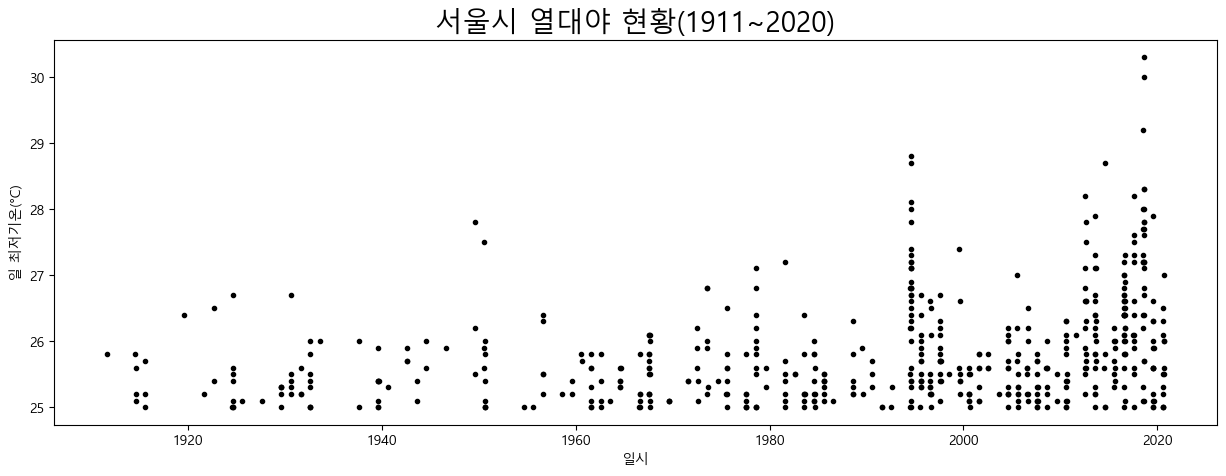

In [16]:
plt.plot(df_seoul_hotnight['일시'],df_seoul_hotnight['최저기온(°C)'],'k.')
plt.title("서울시 열대야 현황(1911~2020)", size=20)
plt.xlabel('일시')
plt.ylabel('일 최저기온(°C)')
plt.show()

In [17]:
# 최고 폭염 최고 열대야 강조하기

In [18]:
# 푝염이 가장 심했던 날 best10

In [19]:
df_seoul_hotestday=df_seoul_hotday.nlargest(10,'최고기온(°C)')
df_seoul_hotestday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1294697,108,서울,2018-08-01,33.6,27.8,39.6
719667,108,서울,1994-07-24,33.1,28.1,38.4
1294696,108,서울,2018-07-31,32.6,27.8,38.3
57401,108,서울,1939-08-10,30.1,24.5,38.2
85687,108,서울,1943-08-24,29.0,23.2,38.2
719666,108,서울,1994-07-23,32.6,28.0,38.2
1294687,108,서울,2018-07-22,31.8,25.3,38.0
1294711,108,서울,2018-08-15,31.7,28.3,38.0
85691,108,서울,1943-08-28,29.2,24.5,37.9
1294698,108,서울,2018-08-02,33.7,30.3,37.9


In [20]:
# 폭염이 가장 심했던 날짜, 최고기온

In [21]:
df_seoul_hotestday=df_seoul_hotestday.iloc[[0]]
df_seoul_hotestday
print(df_seoul_hotestday.iloc[0,2].date())
print(df_seoul_hotestday.iloc[0,5])

2018-08-01
39.6


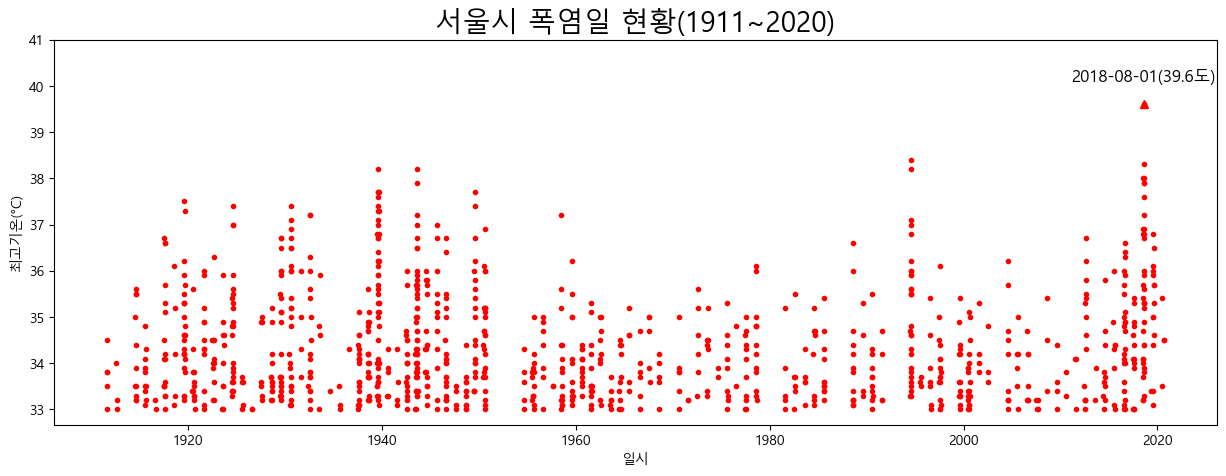

In [22]:
# 서울시 폭염 데이터 시각화

plt.plot(df_seoul_hotday['일시'],df_seoul_hotday['최고기온(°C)'],'r.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)')
plt.title('서울시 폭염일 현황(1911~2020)', size=20)

# 가장 더웠던 날 표시
plt.plot(df_seoul_hotestday.iloc[0,2].date(), df_seoul_hotestday.iloc[0,5], 'r^')

# 가장 더웠던 날짜, 온도 표시
plt.text(df_seoul_hotestday.iloc[0,2].date(), df_seoul_hotestday.iloc[0,5]+0.5,
        str(df_seoul_hotestday.iloc[0,2].date())+'('+str(df_seoul_hotestday.iloc[0,5])+'도)',
        ha='center', size=12)

plt.yticks(range(33,42))

plt.show()

In [23]:
# 열대야가 가장 심했던 날

In [24]:
# 열대야가 가장 심했던 날 best10
df_seoul_hotestnight=df_seoul_hotnight.nlargest(10,'최저기온(°C)')
df_seoul_hotestnight

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1294698,108,서울,2018-08-02,33.7,30.3,37.9
1294699,108,서울,2018-08-03,33.1,30.0,37.9
1294688,108,서울,2018-07-23,31.7,29.2,35.7
719689,108,서울,1994-08-15,30.3,28.8,33.5
719672,108,서울,1994-07-29,31.0,28.7,35.6
1293237,108,서울,2014-08-02,31.4,28.7,35.8
1294702,108,서울,2018-08-06,30.5,28.3,35.3
1294711,108,서울,2018-08-15,31.7,28.3,38.0
1292509,108,서울,2012-08-04,31.7,28.2,36.2
1294337,108,서울,2017-08-06,29.8,28.2,34.0


In [25]:
# 열대야가 가장 심했던 날짜, 최저기온의 최고온도
print(df_seoul_hotestnight.iloc[0,2].date())
print(df_seoul_hotestnight.iloc[0,4])

2018-08-02
30.3


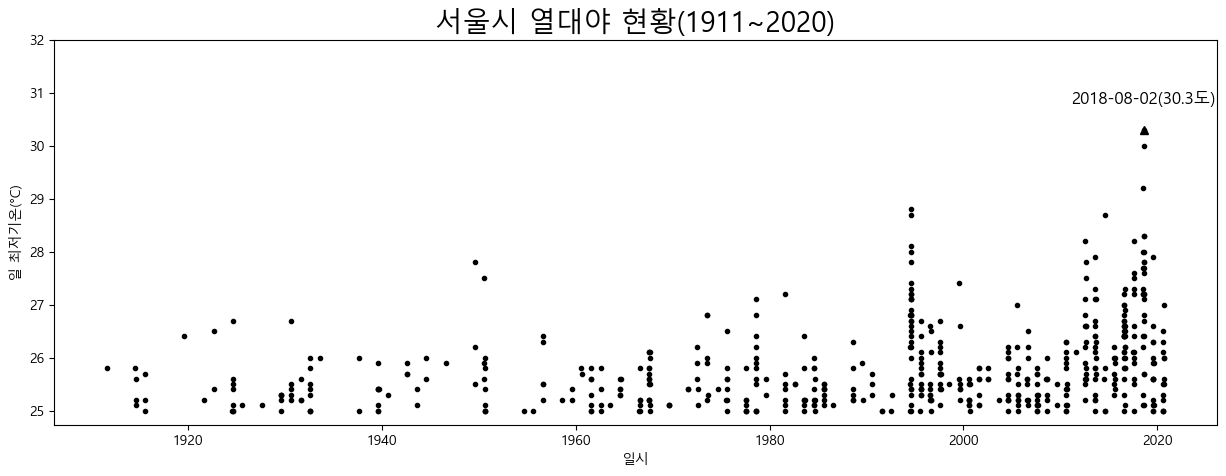

In [26]:
plt.plot(df_seoul_hotnight['일시'],df_seoul_hotnight['최저기온(°C)'],'k.')
plt.title("서울시 열대야 현황(1911~2020)", size=20)
plt.xlabel('일시')
plt.ylabel('일 최저기온(°C)')

# 가장 더웠던 밤 표시
plt.plot(df_seoul_hotestnight.iloc[0,2].date(),df_seoul_hotestnight.iloc[0,4],'k^')

# 가장 더웠던 날짜, 온도 표시
plt.text(df_seoul_hotestnight.iloc[0,2].date(),df_seoul_hotestnight.iloc[0,4]+0.5,
        str(df_seoul_hotestnight.iloc[0,2].date())+'('+str(df_seoul_hotestnight.iloc[0,4])+'도)',
        ha='center', size=12)
plt.yticks(range(25,33))

plt.show()

In [27]:
# 연도별 폭염, 열대야 일수 추출
# 폭염일수가 없는 행이 데이터프레임에 나타나지 않는 단점이 있음
df_seoul_hotday.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3519,108,서울,1911-08-09,27.0,23.1,33.0
3520,108,서울,1911-08-10,28.2,24.2,33.8
3522,108,서울,1911-08-12,28.7,25.8,34.5
3523,108,서울,1911-08-13,27.5,23.0,33.8
3527,108,서울,1911-08-17,26.4,21.5,33.5


In [28]:
# 연도별 폭염일수 : 연도로 그룹핑하여 일수 카운트
df_seoul_hotday_count=df_seoul_hotday.groupby(df_seoul_hotday['일시'].dt.year)['일시'].count().to_frame()
df_seoul_hotday_count

,일시
일시,
1911,5
1912,3
1914,11
1915,10
1916,2
...,...
2016,24
2017,13
2018,35


In [29]:
# 폭염일이 없는 날을 포함시키기 위하여 1911~2020년의 연도 데이터프레임 생성
df_years=pd.DataFrame(range(1911,2021))
df_years.index = df_years[0]
df_years

,0
0,
1911,1911
1912,1912
1913,1913
1914,1914
1915,1915
...,...
2016,2016
2017,2017
2018,2018


In [30]:
# 연도별 폭염일수, 연도 데이터프레임 concat
df_seoul_hotday_count=pd.concat([df_seoul_hotday_count,df_years], axis=1).sort_index()
df_seoul_hotday_count

,일시,0
1911,5.0,1911
1912,3.0,1912
1913,NaN,1913
1914,11.0,1914
1915,10.0,1915
...,...,...
2016,24.0,2016
2017,13.0,2017
2018,35.0,2018
2019,15.0,2019


In [31]:
# 불필요한 컬럼 삭제
df_seoul_hotday_count=df_seoul_hotday_count.drop(columns=[0])
df_seoul_hotday_count

,일시
1911,5.0
1912,3.0
1913,NaN
1914,11.0
1915,10.0
...,...
2016,24.0
2017,13.0
2018,35.0
2019,15.0


In [32]:
# 결측치 확인
df_seoul_hotday_count.isnull().sum()

일시    13
dtype: int64

In [33]:
# null ~> 폭염일이 없음을 뜻함 -> null을 0으로 채우기
df_seoul_hotday_count=df_seoul_hotday_count.fillna(0)

In [34]:
# 컬럼명을 알맞게 바꾸기
df_seoul_hotday_count.columns=['폭염일수']
df_seoul_hotday_count

,폭염일수
1911,5.0
1912,3.0
1913,0.0
1914,11.0
1915,10.0
...,...
2016,24.0
2017,13.0
2018,35.0
2019,15.0


In [35]:
# 폭염일수 데이터를 정수형으로 바꾸기
df_seoul_hotday_count=df_seoul_hotday_count.astype('int64')

In [36]:
# 폭염이 가장 많았던 해의 데이터 best10
df_seoul_hotday_count.nlargest(10,'폭염일수')

,폭염일수
1939,47
1943,43
2018,35
1994,29
1919,25
1950,25
1930,24
2016,24
1924,23
1929,22


In [37]:
# 연도별 열대야일수 추출
df_seoul_hotnight.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3522,108,서울,1911-08-12,28.7,25.8,34.5
4601,108,서울,1914-07-26,29.7,25.8,35.6
4602,108,서울,1914-07-27,30.2,25.6,35.5
4605,108,서울,1914-07-30,25.7,25.1,27.4
4621,108,서울,1914-08-15,27.2,25.2,31.5


In [38]:
# 연도별 열대야일수 : 연도로 그룹핑하여 일수 카운트
df_seoul_hotnight_count=df_seoul_hotnight.groupby(df_seoul_hotnight['일시'].dt.year)['일시'].count().to_frame()
df_seoul_hotnight_count

,일시
일시,
1911,1
1914,4
1915,3
1919,1
1921,1
...,...
2016,32
2017,14
2018,28


In [39]:
# 열대야가 없는 날을 포함시키기 위하여 1911~2020년의 연도 데이터프레임 생성
# df_year는 이미 만든게 있음

In [40]:
# 연도별 열대야일수, 연도 데이터프레임 concat
df_seoul_hotnight_count=pd.concat([df_seoul_hotnight_count, df_years], axis=1).sort_index()
df_seoul_hotnight_count

,일시,0
1911,1.0,1911
1912,NaN,1912
1913,NaN,1913
1914,4.0,1914
1915,3.0,1915
...,...,...
2016,32.0,2016
2017,14.0,2017
2018,28.0,2018
2019,16.0,2019


In [41]:
# 불필요한 컬럼 삭제
df_seoul_hotnight_count=df_seoul_hotnight_count.drop(columns=[0])

In [42]:
# 결측치 확인
df_seoul_hotnight_count.isnull().sum()

일시    28
dtype: int64

In [43]:
# null ~> 열대야가 없음을 뜻함 -> null을 0으로 채우기
df_seoul_hotnight_count=df_seoul_hotnight_count.fillna(0)

In [44]:
# 컬럼명을 알맞게 바꾸기
df_seoul_hotnight_count.columns=['열대야일수']

In [45]:
# 열대야일수 데이터를 정수형으로 바꾸기
df_seoul_hotnight_count=df_seoul_hotnight_count.astype('int64')

In [46]:
# 열대야가 가장 많았던 해의 데이터 best10
df_seoul_hotnight_count.nlargest(10,'열대야일수')

,열대야일수
1994,34
2016,32
2018,28
2013,20
2012,17
1967,16
2019,16
1995,15
1997,14
2010,14


In [47]:
# 연도별 폭염일수, 연도별 열대야일수 시각화

In [48]:
# 서브플롯으로 비교하기

In [49]:
df_seoul_hotday_count.head(3)

,폭염일수
1911,5
1912,3
1913,0


In [50]:
df_seoul_hotnight_count.head(3)

,열대야일수
1911,1
1912,0
1913,0


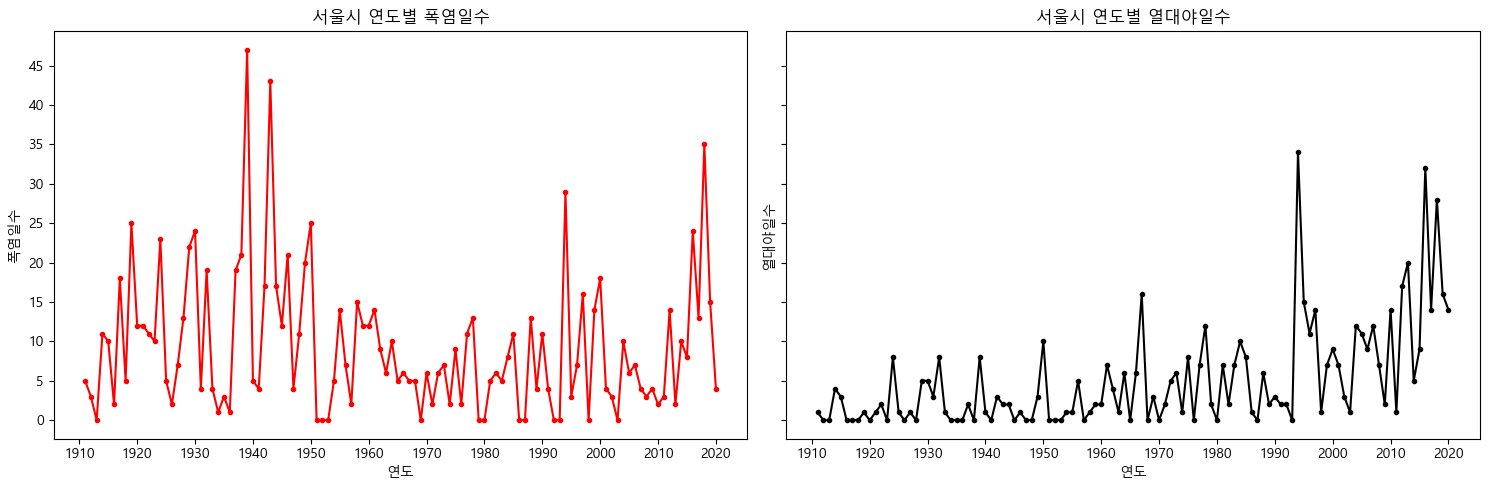

In [64]:
fig, ax = plt.subplots(1,2,sharex=True,sharey=True)

ax[0].plot(df_seoul_hotday_count.index,df_seoul_hotday_count['폭염일수'],'r.-')
ax[1].plot(df_seoul_hotnight_count.index,df_seoul_hotnight_count['열대야일수'],'k.-')

ax[0].set_xlabel('연도')
ax[1].set_xlabel('연도')

ax[0].set_ylabel('폭염일수')
ax[1].set_ylabel('열대야일수')

ax[0].set_xticks(range(1910,2021,10))
ax[0].set_yticks(range(0,50,5))

ax[0].set_title('서울시 연도별 폭염일수')
ax[1].set_title('서울시 연도별 열대야일수')

fig.tight_layout()
plt.show()

In [65]:
# 다중막대그래프로 비교하기

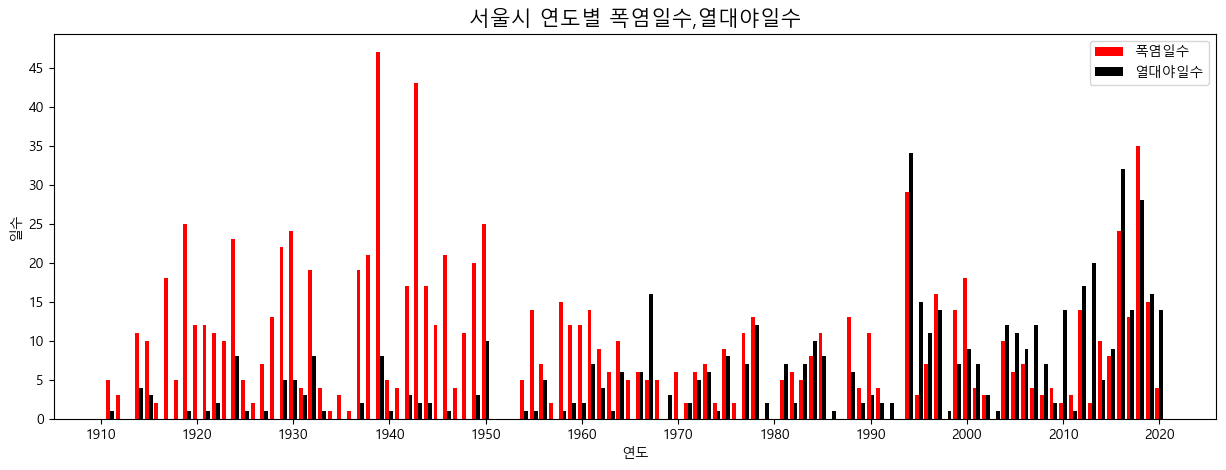

In [76]:
fig,ax=plt.subplots()
ax.bar(df_seoul_hotday_count.index,df_seoul_hotday_count['폭염일수'],
       width=-0.4,align='edge',color='r',label='폭염일수')
ax.bar(df_seoul_hotnight_count.index,df_seoul_hotnight_count['열대야일수'],
       width=0.4,align='edge',color='k',label='열대야일수')
ax.legend()
ax.set_title('서울시 연도별 폭염일수,열대야일수',size=15)
ax.set_xlabel('연도')
ax.set_ylabel('일수')
ax.set_xticks(range(1910,2021,10))
ax.set_yticks(range(0,50,5))
plt.show()